In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
# Load datasets
orders = pd.read_csv('data/olist_orders_dataset.csv')
order_items = pd.read_csv('data/olist_order_items_dataset.csv')
order_payments = pd.read_csv('data/olist_order_payments_dataset.csv')
order_reviews = pd.read_csv('data/olist_order_reviews_dataset.csv')
customers = pd.read_csv('data/olist_customers_dataset.csv')
sellers = pd.read_csv('data/olist_sellers_dataset.csv')
geolocation = pd.read_csv('data/olist_geolocation_dataset.csv')
products = pd.read_csv('data/olist_products_dataset.csv')
product_category = pd.read_csv('data/product_category_name_translation.csv')

<hr>

In [34]:
new_name_column = 'zip_code_prefix'
geolocation.rename(columns={'geolocation_zip_code_prefix': new_name_column}, inplace=True)
sellers.rename(columns={'seller_zip_code_prefix': new_name_column}, inplace=True)
customers.drop('customer_zip_code_prefix', axis=1, inplace=True)
# customers.rename(columns={'customer_zip_code_prefix': new_name_column}, inplace=True)

In [35]:
geolocation = geolocation.drop_duplicates()
geolocation.info()

<class 'pandas.core.frame.DataFrame'>
Index: 738332 entries, 0 to 1000161
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   zip_code_prefix    738332 non-null  int64  
 1   geolocation_lat    738332 non-null  float64
 2   geolocation_lng    738332 non-null  float64
 3   geolocation_city   738332 non-null  object 
 4   geolocation_state  738332 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 33.8+ MB


In [36]:
# geolocation.drop(columns=['geolocation_lat','geolocation_lng'], inplace=True)

In [37]:
# Ambil informasi geolokasi unik berdasarkan zip_code_prefix
unique_geolocation = geolocation.drop_duplicates(subset=['zip_code_prefix'])

<hr>

In [38]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [39]:
customer_orders = pd.merge(orders, customers, on='customer_id', how='inner')

In [40]:
orders_items_merged = pd.merge(customer_orders, order_items, on='order_id', how='inner')

In [41]:
orders_items_payments_merged = pd.merge(orders_items_merged, order_payments, on='order_id', how='inner')

In [42]:
# Merge the result with order_reviews
order_merged_data = pd.merge(orders_items_payments_merged, order_reviews, on='order_id', how='inner')

In [43]:
# Merge the result with sellers
order_sellers_merged = pd.merge(order_merged_data, sellers, on='seller_id', how='inner')

In [44]:
# Merge products with product_category
products_full = pd.merge(products, product_category, on='product_category_name', how='inner')

In [45]:
# Merge the result with products
order_products_merged = pd.merge(order_sellers_merged, products_full, on='product_id', how='inner')

In [46]:
# Ini akan memastikan bahwa setiap order_id hanya memiliki satu set informasi geolokasi
full_merged = pd.merge(order_products_merged, unique_geolocation, on='zip_code_prefix', how='inner')

# Tampilkan informasi setelah merge
full_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115346 entries, 0 to 115345
Data columns (total 43 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       115346 non-null  object 
 1   customer_id                    115346 non-null  object 
 2   order_status                   115346 non-null  object 
 3   order_purchase_timestamp       115346 non-null  object 
 4   order_approved_at              115332 non-null  object 
 5   order_delivered_carrier_date   114154 non-null  object 
 6   order_delivered_customer_date  112949 non-null  object 
 7   order_estimated_delivery_date  115346 non-null  object 
 8   customer_unique_id             115346 non-null  object 
 9   customer_city                  115346 non-null  object 
 10  customer_state                 115346 non-null  object 
 11  order_item_id                  115346 non-null  int64  
 12  product_id                    

In [47]:
data=[]
for i in full_merged.columns:
    data.append([i,
                 full_merged[i].dtypes,
                 full_merged[i].isna().sum(),
                 full_merged[i].nunique(),
                 full_merged[i].unique()])
    
dataset = pd.DataFrame(data,columns=["feature name","type","null","nunique","unique"])
dataset

,feature name,type,null,nunique,unique
0,order_id,object,0,96302,"[e481f51cbdc54678b7cc49136f2d6af7, 128e10d9571..."
1,customer_id,object,0,96302,"[9ef432eb6251297304e76186b10a928d, a20e8105f23..."
2,order_status,object,0,7,"[delivered, processing, shipped, invoiced, can..."
3,order_purchase_timestamp,object,0,95777,"[2017-10-02 10:56:33, 2017-08-15 18:29:31, 201..."
4,order_approved_at,object,14,88142,"[2017-10-02 11:07:15, 2017-08-15 20:05:16, 201..."
5,order_delivered_carrier_date,object,1192,79053,"[2017-10-04 19:55:00, 2017-08-17 15:28:33, 201..."
6,order_delivered_customer_date,object,2397,93492,"[2017-10-10 21:25:13, 2017-08-18 14:44:43, 201..."
7,order_estimated_delivery_date,object,0,449,"[2017-10-18 00:00:00, 2017-08-28 00:00:00, 201..."
8,customer_unique_id,object,0,93195,"[7c396fd4830fd04220f754e42b4e5bff, 3a51803cc0d..."
9,customer_city,object,0,4088,"[sao paulo, florianopolis, itaquaquecetuba, ca..."


<hr>

### Export to CSV

In [48]:
# order_products_merged.to_csv('data_merge_(-)add_(-)geo.csv',index=False)

# Exploratory Data Analysis

In [49]:
# df = full_merged_unique.copy()

In [50]:
# change type to datetime
datetime_columns = [
    'order_purchase_timestamp', 'order_approved_at', 
    'order_delivered_carrier_date', 'order_delivered_customer_date',
    'order_estimated_delivery_date', 'shipping_limit_date',
    'review_creation_date', 'review_answer_timestamp'
]

full_merged[datetime_columns] = full_merged[datetime_columns].apply(pd.to_datetime)

In [51]:
data=[]
for i in full_merged.columns:
    data.append([i,
                 full_merged[i].dtypes,
                 full_merged[i].isna().sum(),
                 full_merged[i].nunique(),
                 full_merged[i].unique()])
    
dataset = pd.DataFrame(data,columns=["feature name","type","null","nunique","unique"])
dataset

,feature name,type,null,nunique,unique
0,order_id,object,0,96302,"[e481f51cbdc54678b7cc49136f2d6af7, 128e10d9571..."
1,customer_id,object,0,96302,"[9ef432eb6251297304e76186b10a928d, a20e8105f23..."
2,order_status,object,0,7,"[delivered, processing, shipped, invoiced, can..."
3,order_purchase_timestamp,datetime64[ns],0,95777,"[2017-10-02 10:56:33, 2017-08-15 18:29:31, 201..."
4,order_approved_at,datetime64[ns],14,88142,"[2017-10-02 11:07:15, 2017-08-15 20:05:16, 201..."
5,order_delivered_carrier_date,datetime64[ns],1192,79053,"[2017-10-04 19:55:00, 2017-08-17 15:28:33, 201..."
6,order_delivered_customer_date,datetime64[ns],2397,93492,"[2017-10-10 21:25:13, 2017-08-18 14:44:43, 201..."
7,order_estimated_delivery_date,datetime64[ns],0,449,"[2017-10-18 00:00:00, 2017-08-28 00:00:00, 201..."
8,customer_unique_id,object,0,93195,"[7c396fd4830fd04220f754e42b4e5bff, 3a51803cc0d..."
9,customer_city,object,0,4088,"[sao paulo, florianopolis, itaquaquecetuba, ca..."


## Remove Unnecessary Columns

In [52]:
# full_merged.drop(['order_id','customer_id','customer_unique_id','seller_id','review_id'], axis=1, inplace=True)

In [53]:
# # delete category column with brazilian language
# full_merged.drop(['product_category_name'], axis=1, inplace=True)

In [54]:
# # Delete Comment data
# full_merged.drop(['review_comment_title','review_comment_message'],axis=1, inplace=True)

## Identify Type Of Column

In [55]:
# Identify Categorical Column
categorical_columns = full_merged.select_dtypes(include=['object']).columns.tolist()

# Identify Numerical Column
numerical_columns = full_merged.select_dtypes(include=['float64','int64']).columns.tolist()

#Identify date column
date_columns = full_merged.select_dtypes(include=['datetime64']).columns.tolist()

## Distribution

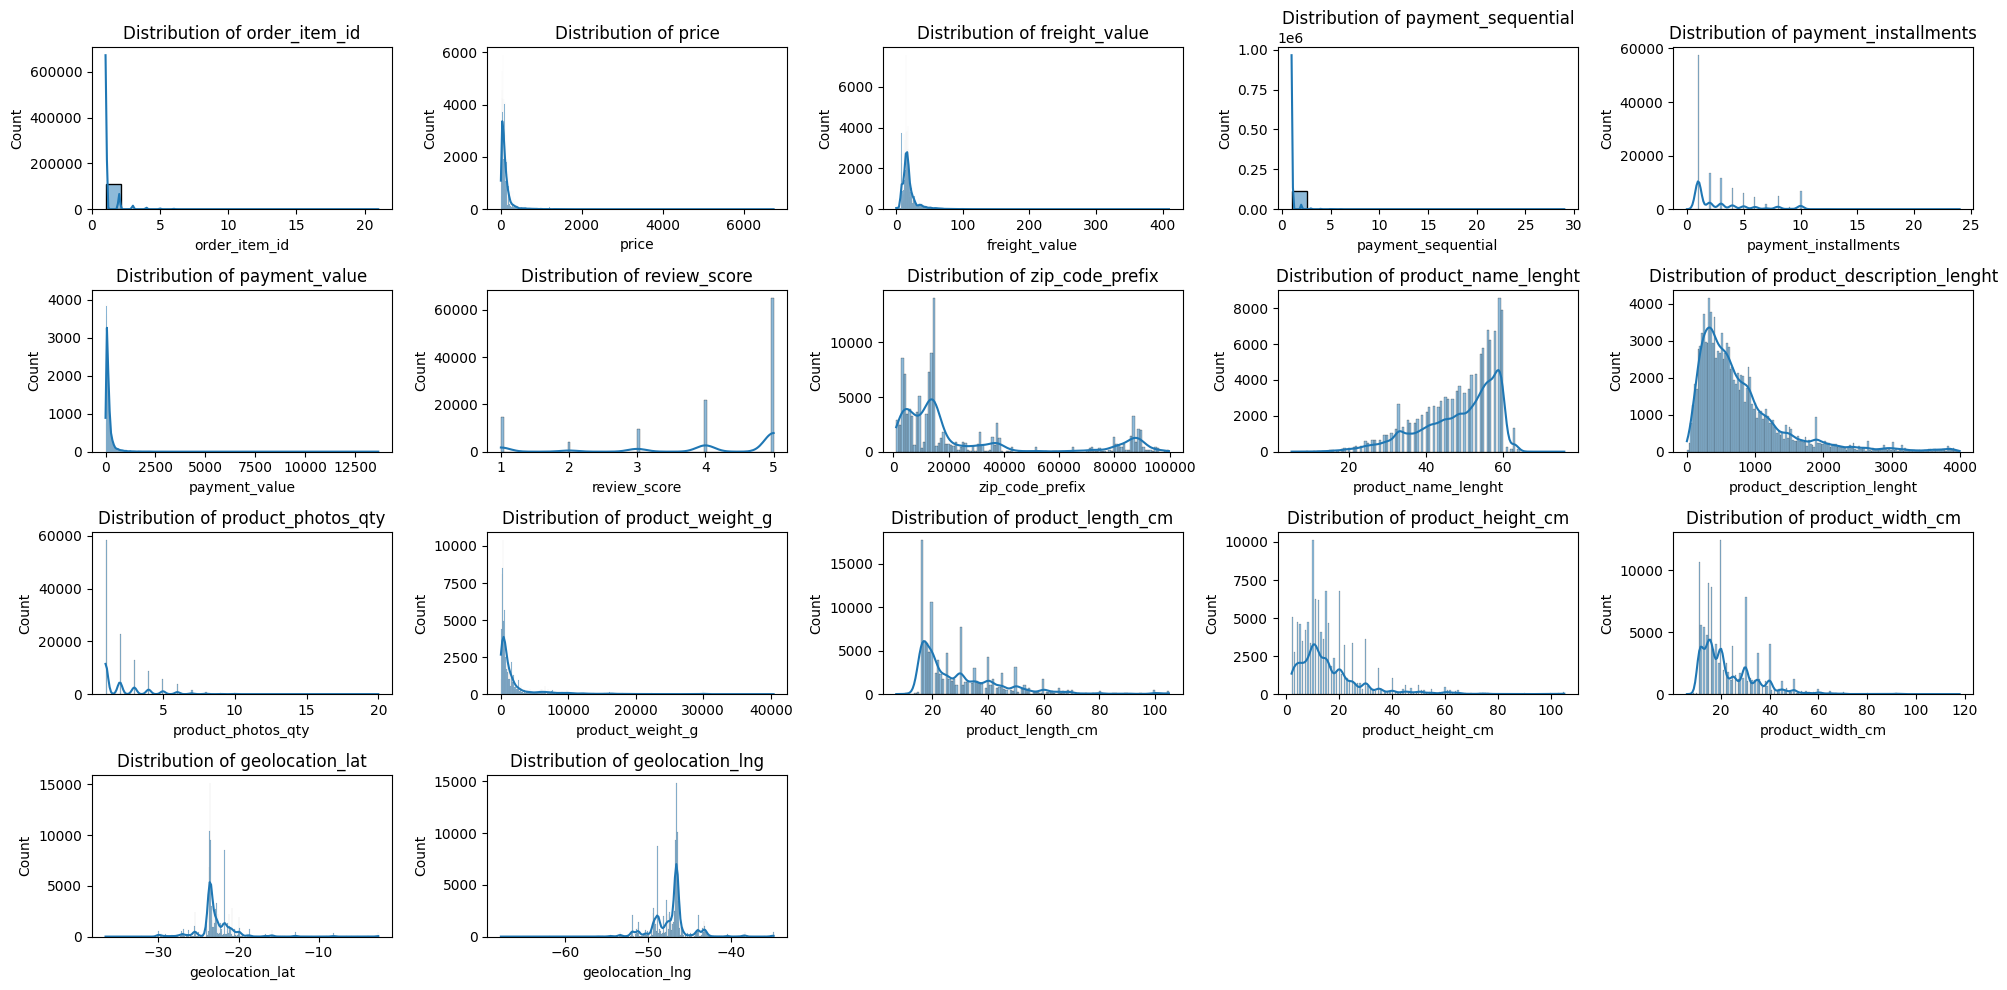

In [64]:
num_plots = len(numerical_columns)

# Create subplots
fig, ax = plt.subplots(4, 5, figsize=(20, 10))
ax = ax.flatten()  # Flatten the 2D array of axes to 1D

# Plot the distribution of each numerical column
for i, column in enumerate(numerical_columns):
    sns.histplot(full_merged[column], kde=True, ax=ax[i])
    ax[i].set_title(f'Distribution of {column}')

# Hide any unused subplots
for j in range(i + 1, len(ax)):
    fig.delaxes(ax[j])

plt.tight_layout()
plt.show()

## Missing Value

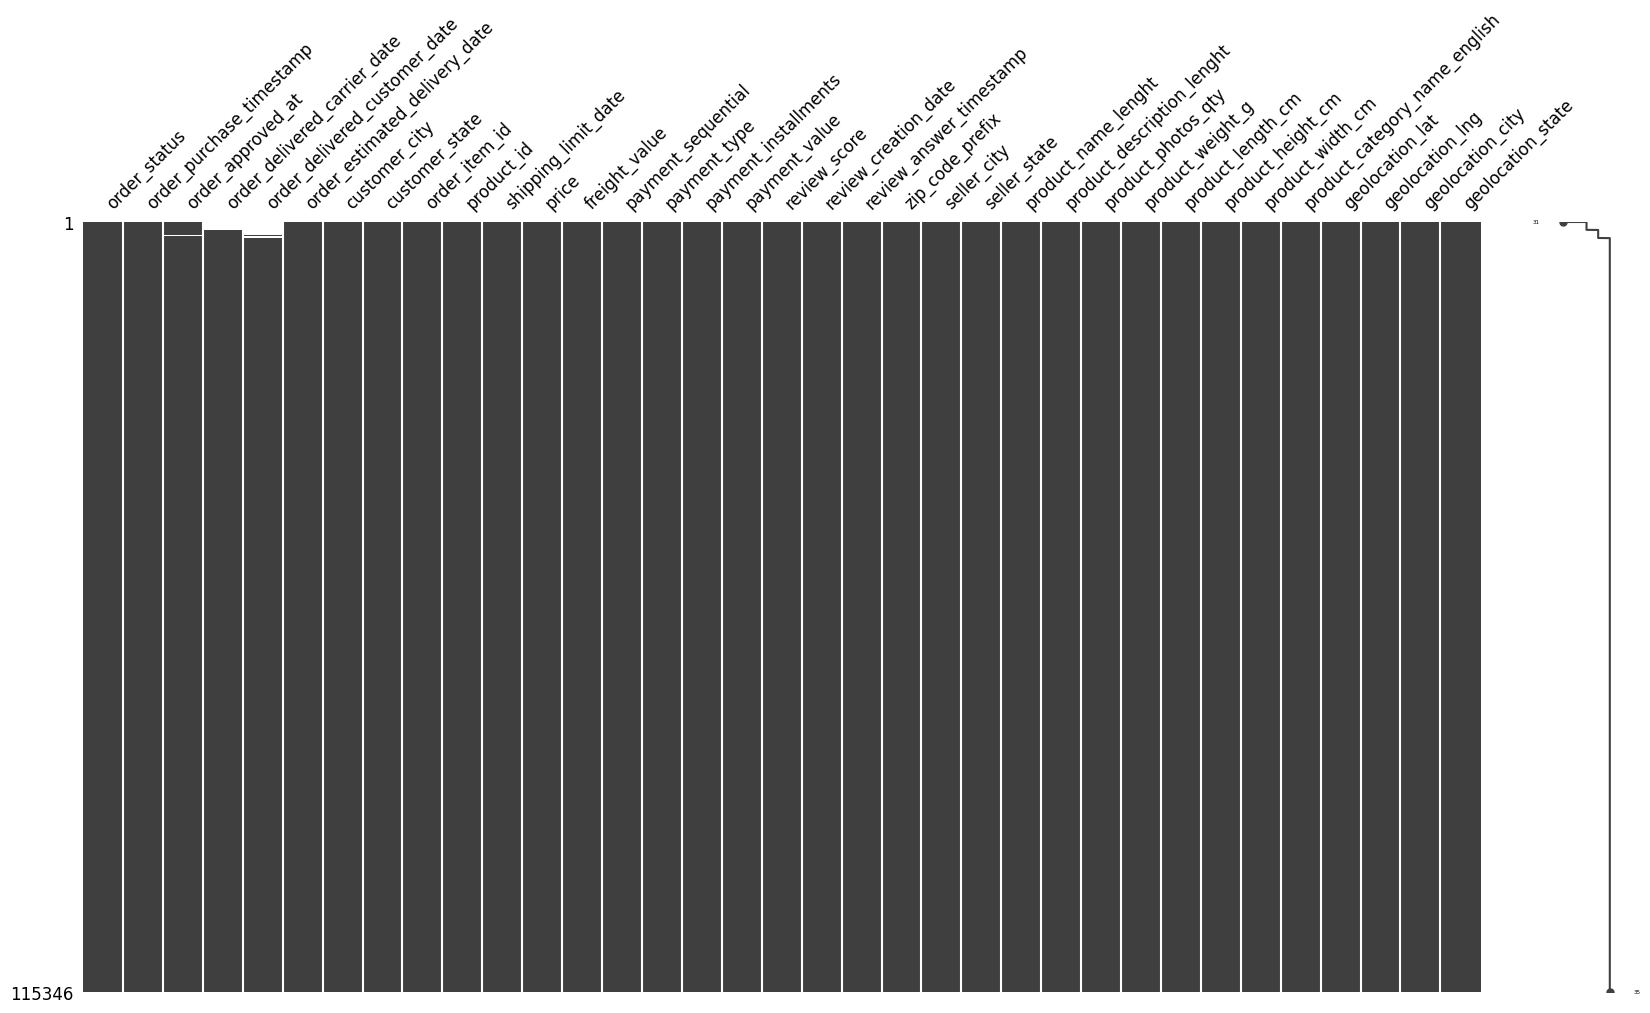

In [57]:
import missingno as msn
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
ax = msn.matrix(full_merged, figsize=(20, 10), fontsize=5, sort='ascending')

# Customize the tick labels
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12)  # Adjust the fontsize as needed
ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)  # Adjust the fontsize as needed

plt.show()

## Corelation Between Numeric Features

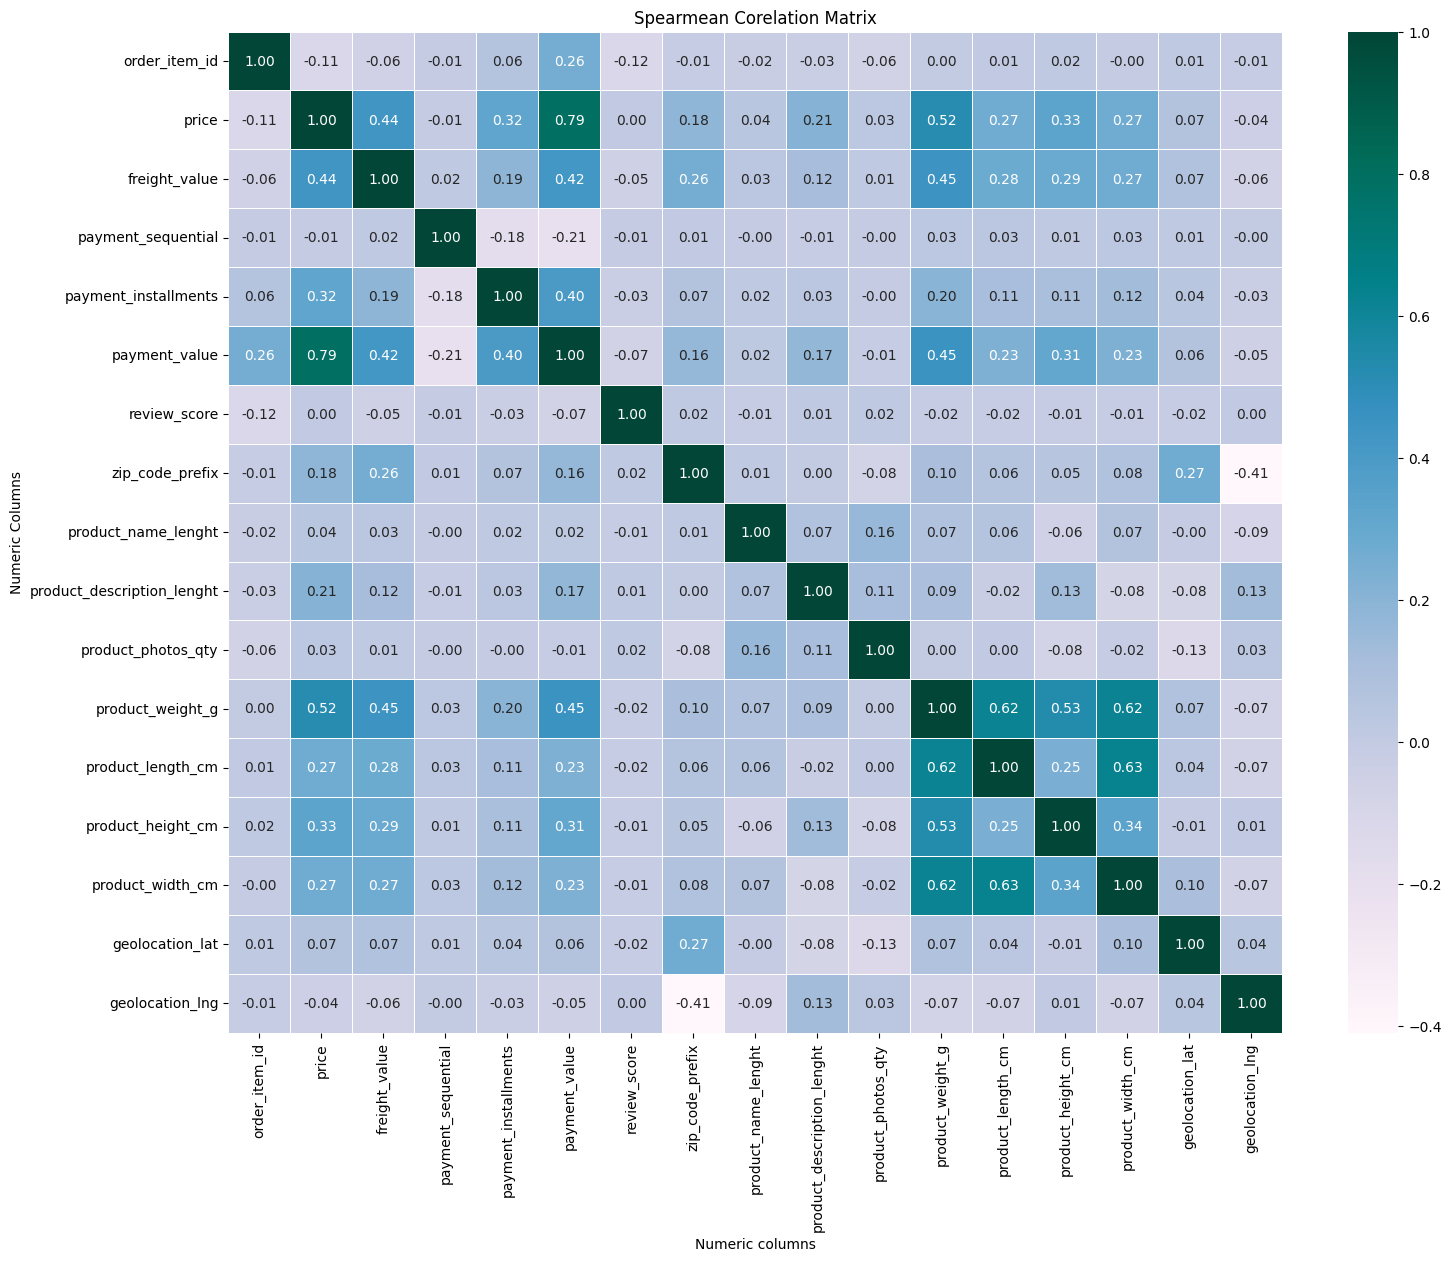

In [58]:
corr_matrix = full_merged[numerical_columns].corr(method='spearman')

plt.figure(figsize=(17,13))
sns.heatmap(corr_matrix, annot=True, cmap='PuBuGn', fmt='.2f', linewidths=0.5)
plt.title('Spearmean Corelation Matrix')
plt.xlabel('Numeric columns')
plt.ylabel('Numeric Columns')
plt.show()

## Outlier

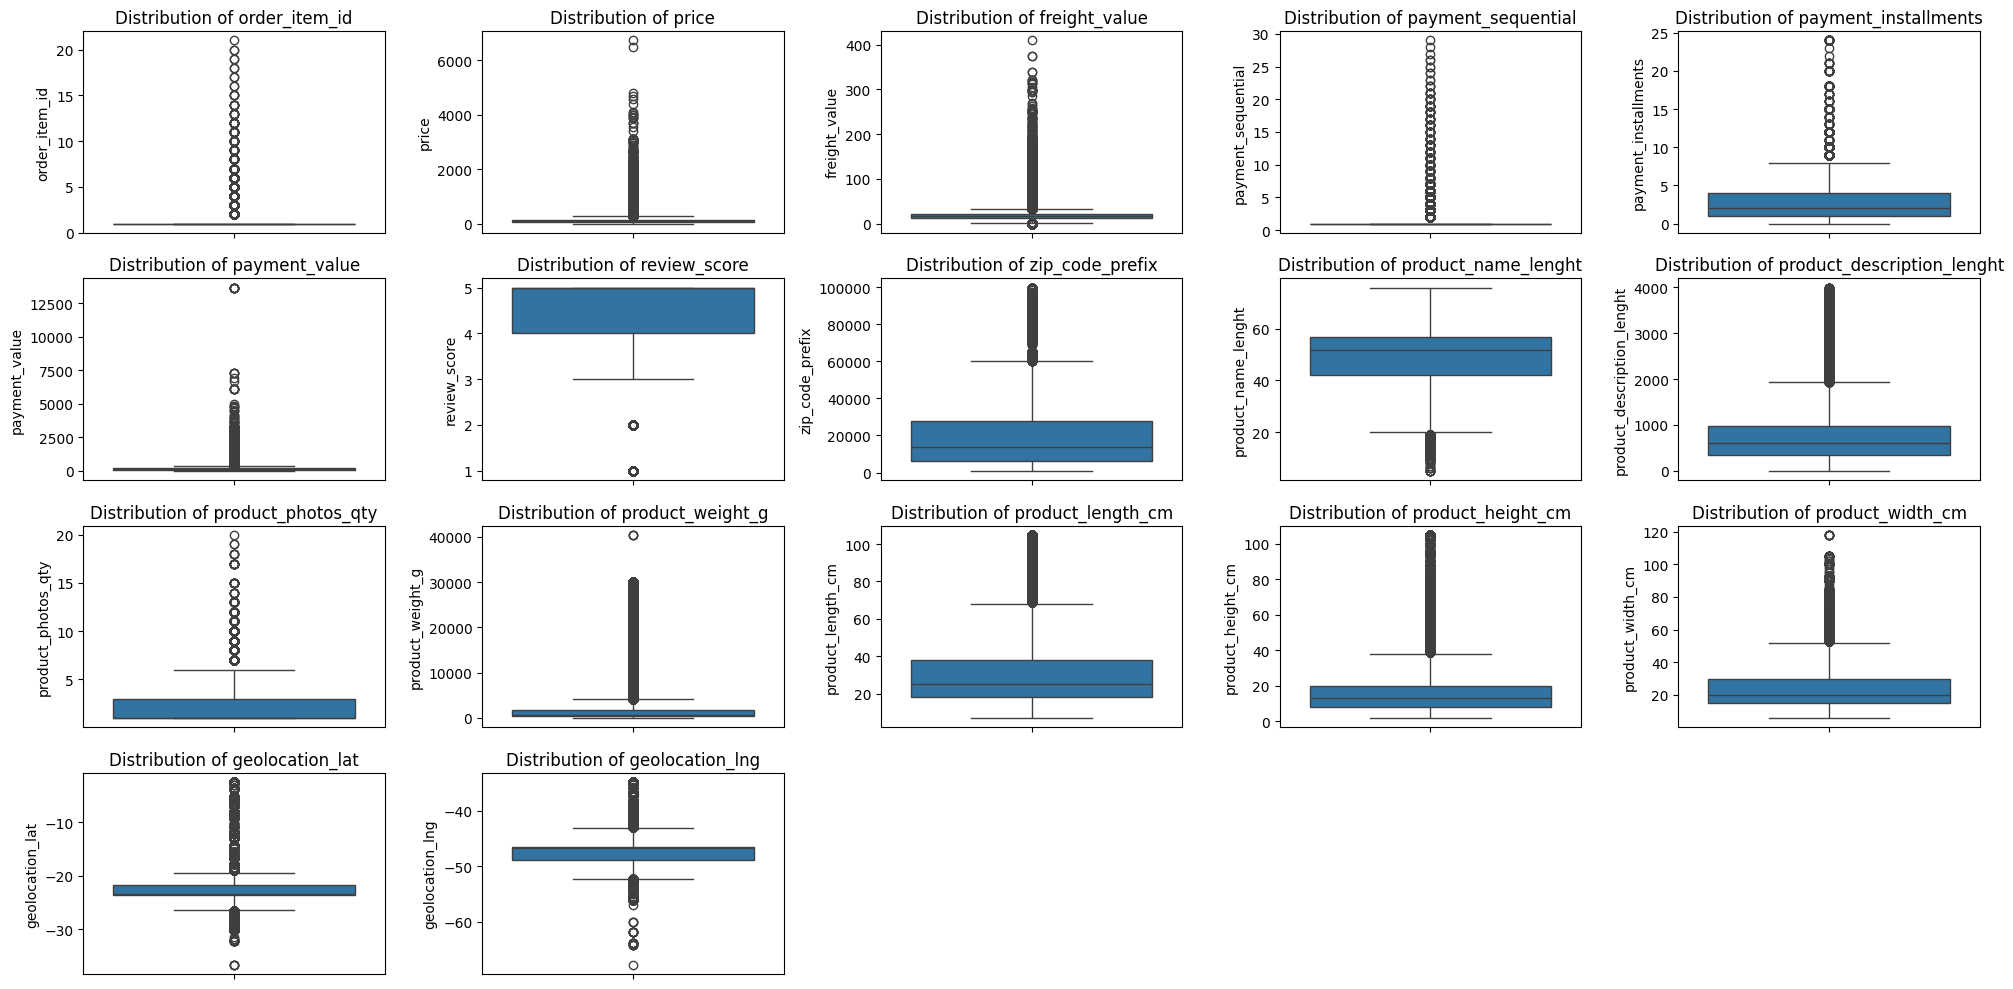

In [59]:
num_plots = len(numerical_columns)
rows = (num_plots // 5) + 1 if num_plots % 5 != 0 else num_plots // 5
cols = 5

# Create subplots
fig, ax = plt.subplots(rows, cols, figsize=(20, 10))
ax = ax.flatten()  # Flatten the 2D array of axes to 1D

# Plot the distribution of each numerical column using boxplots
for i, column in enumerate(numerical_columns):
    sns.boxplot(full_merged[column], ax=ax[i])
    ax[i].set_title(f'Distribution of {column}')

# Hide any unused subplots
for j in range(i + 1, len(ax)):
    fig.delaxes(ax[j])

plt.tight_layout()
plt.show()

## Duplicate Data

In [60]:
full_merged.duplicated().sum()

0